# Pymaceuticals Inc:
***
<img src="https://hicomm.bg/uploads/articles/201808/57529/mainimage-szdadeni-v-laboratoriya-beli-drobove-veche-se-transplantirat-v-zhivotni.jpg" alt="pymaceuticals" title="Pymaceuticals" />

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of Los Angeles, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.


As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.


>To do this you are tasked with:
1. Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
2. Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
3. Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
4. Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

## Initial Data Ingestion/Setup
---

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mdd_df = pd.read_csv("data/mouse_drug_data.csv")
ctd_df = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
merged_df = pd.merge(mdd_df, ctd_df, how="inner", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## 1. Tumor Response to Treatment
---

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merged_df.groupby(["Drug", "Timepoint"])
MeanTumorVolume = grouped_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
MeanTumorVolume_df = pd.DataFrame(MeanTumorVolume)

# Preview DataFrame
MeanTumorVolume_df = MeanTumorVolume_df.reset_index()
MeanTumorVolume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
StdError = grouped_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
StdError_df = pd.DataFrame(StdError)

# Preview DataFrame
StdError_df.reset_index(inplace=True)
StdError_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames for future plotting
Pivot_MeanTumorVolume_df = MeanTumorVolume_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
Pivot_MeanTumorVolume_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


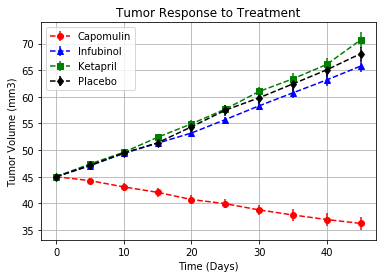

In [5]:
# Generate the Plot (with Error Bars)

# Make a drug list with tuples to indicate formatting ("drug", "marker", "colors")
drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]

# Use for loop to graph each drug performance
for drug, marker, colors in drug_format_list:
    tumor_ste = StdError[drug] # Find the std error per drug in list of tuples
    tumor_treatment_plt = plt.errorbar(Pivot_MeanTumorVolume_df.index,Pivot_MeanTumorVolume_df[drug],
                                       yerr=tumor_ste,fmt=marker,ls = "--", color=colors)
plt.legend(loc="best") # Place the legend in the most optimal place
plt.title("Tumor Response to Treatment") # Title the graph
plt.xlabel("Time (Days)") # Set x-label
plt.ylabel("Tumor Volume (mm3)") # Set y-label
plt.grid() # Plot grid

# Save the Figure to a png in the "figures" folder
plt.savefig(os.path.join("figures","fig1_tumor_response_to_treatment.png"))

## 2. Metastatic Response to Treatment
---

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Mean_MetSites = grouped_df["Metastatic Sites"].mean()

# Convert to DataFrame
Mean_MetSites_df = pd.DataFrame(Mean_MetSites)

# Preview DataFrame
Mean_MetSites_df = Mean_MetSites_df.reset_index()
Mean_MetSites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SEM_MetSites = grouped_df["Metastatic Sites"].sem()

# Convert to DataFrame
SEM_MetSites_df = pd.DataFrame(SEM_MetSites)

# Preview DataFrame
SEM_MetSites_df= SEM_MetSites_df.reset_index()
SEM_MetSites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
pivot_Mean_MetSites_df = Mean_MetSites_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
pivot_Mean_MetSites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


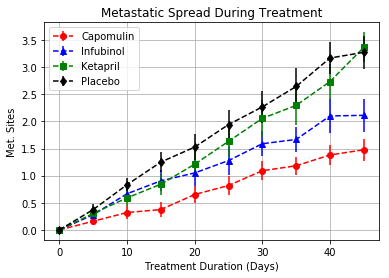

In [9]:
# Generate the Plot (with Error Bars)

# Make a drug list with tuples to indicate formatting ("drug", "marker", "colors")
drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]

# Use for loop to graph each drug performance
for drug, marker, colors in drug_format_list:
    met_ste = SEM_MetSites[drug] # Find the std error per drug in list of tuples
    met_treatment_plt = plt.errorbar(pivot_Mean_MetSites_df.index,pivot_Mean_MetSites_df[drug],
                                     yerr=met_ste, fmt=marker,ls = "--", color=colors)
plt.legend(loc="best") # Place the legend in the most optimal place
plt.title("Metastatic Spread During Treatment") # Title the graph
plt.xlabel("Treatment Duration (Days)") # Set x-label
plt.ylabel("Met. Sites") # Set y-label
plt.grid() # Plot grid

# Save the Figure to a png in the "figures" folder
plt.savefig(os.path.join("figures","fig2_metastatic_spread_during_treatment.png"))

## 3. Survival Rates
---

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = grouped_df["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_count_df.reset_index(inplace=True)
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse_count_df = mouse_count_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
pivot_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


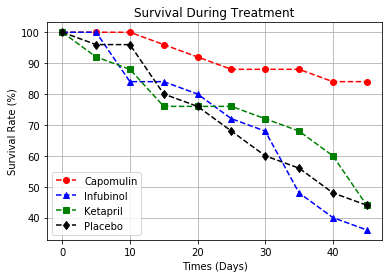

In [12]:
# Generate the Plot (Accounting for percentages)

# Make a drug list with tuples to indicate formatting ("drug", "marker", "colors")
##REFERENCE## drug_format_list = [("Capomulin","o","red"),("Infubinol","^","blue"),("Ketapril","s","green"),("Placebo","d","black")]

# Use for loop to graph each drug performance
for drug,marker,colors in drug_format_list:
    total_mouse = pivot_mouse_count_df[drug][0]
    survival_rate = (pivot_mouse_count_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_mouse_count_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors)
# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig(os.path.join('figures','fig3_survival_during_treatment.png'))

## 4. Summary Bar Graph
---

In [13]:
# Calculate the percent changes for each drug: pct_change = ((new/old)-1)*100
pct_change = ((Pivot_MeanTumorVolume_df.iloc[-1] / Pivot_MeanTumorVolume_df.iloc[0])-1)*100

# Display the data to confirm
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

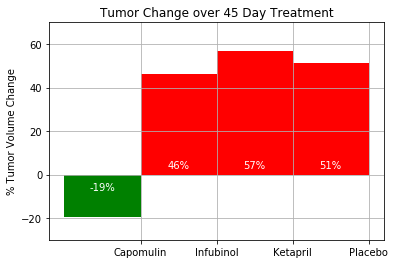

In [14]:
# Splice the data between passing and failing drugs
passing = pct_change < 0

# Orient widths. Add labels, tick marks, etc. 
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
change_list = [(pct_change[drug]) for drug in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align="edge",color=passing.map({True:"g",False:"r"}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over 45 Day Treatment")

# Use functions to label the percentages of changes
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(bar.get_x() + bar.get_width()/2, label_position,
                 "%d" % int(height)+"%",color="white",
                ha="center", va="bottom")
                
# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig(os.path.join("figures","fig4_tumor_change_over_45day_treatment.png"))